In [4]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-v0_8')

In [5]:
def data_visualisation(plot_data1, plot_data2, plot_data3, plot_data4, plot_data5,
                       legend1, legend2, legend3, legend4, legend5):

    plt.plot(plot_data1[0], plot_data1[1], label=legend1)
    plt.plot(plot_data2[0], plot_data2[1], label=legend2)
    plt.plot(plot_data3[0], plot_data3[1], label=legend3)
    plt.plot(plot_data4[0], plot_data4[1], label=legend4)
    plt.plot(plot_data5[0], plot_data5[1], label=legend5)

    plt.xlabel('Displacement [mm]')
    plt.ylabel('Force [N]')
    # plt.title(f"Design: {title}")    # Design wordt bedoeld met title
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
def data_visualisation2(plot_data1, plot_data2, plot_data3, title, legend1, legend2, legend3):

    plt.plot(plot_data1[0], plot_data1[1], label=legend1)
    plt.plot(plot_data2[0], plot_data2[1], label=legend2, linestyle='dashed')
    plt.plot(plot_data3[0], plot_data3[1], label=legend3, linestyle='dotted')

    plt.xlabel('Displacement [mm]')
    plt.ylabel('Force [N]')
    plt.title(f"{title}")    # Design wordt bedoeld met title
    plt.legend()
    plt.tight_layout()
    plt.show()

In [122]:
def data_visualisation3(data1, data2, data3, legend1, legend2, legend3, y_as, title):
    x_values = list(range(1, 1+len(data1)))  # Alle arrays moeten dezelfde lengte hebben om deze functie te gebruiken.
    # x_values = list(range(0, 2+len(data1)))
    
    # plt.scatter(x_values, data1, label=legend1, marker='s', color='blue')  # Vierkant design
    # plt.scatter(x_values, data2, label=legend2, marker='^', color='green')  # Driehoekig design
    # plt.scatter(x_values, data3, label=legend3, color='red')  # Rond design
    
    Average1 = data_analysis(data1)[0]
    Error1 = data_analysis(data1)[3]
    plt.axhline(y=Average1, color='blue', label=f'{legend1}')
    plt.fill_between(x_values, Average1-Error1, Average1+Error1, alpha=0.3, color='turquoise')
    
    Average2 = data_analysis(data2)[0]
    Error2 = data_analysis(data2)[3]
    plt.axhline(y=Average2, color='green', label=f'{legend2}')
    plt.fill_between(x_values, Average2-Error2, Average2+Error2, alpha=0.3, color='lightgreen')
    
    Average3 = data_analysis(data3)[0]
    Error3 = data_analysis(data3)[3]
    plt.axhline(y=Average3, color='red', label=f'{legend3}')
    plt.fill_between(x_values, Average3-Error3, Average3+Error3, alpha=0.3, color='lightcoral')
    
    ax = plt.gca()
    plt.ylabel(f'{y_as}')
    plt.title(f'{title}')
    plt.xticks(x_values) # Zorgt ervoor dat x-waarden als integers worden vertoond.
    plt.legend(bbox_to_anchor=[0.85, 0.45], loc='center')
    plt.margins(x=0)
    ax.get_xaxis().set_visible(False)
    plt.tight_layout()
    plt.plot()

In [9]:
def data_analysis(data):
    Average = np.mean(data, axis=0)                 # Gemiddelde
    StDv = np.std(data, ddof=1)                     # Standaard deviatie
    Alpha = 0.05                                    # Overschrijdingskans
    DoF = len(data) - 1                             # Vrijheidsgraden
    T_test = stats.t.ppf(1 - Alpha/2, DoF)          # T-toets
    Confidence = T_test*StDv/np.sqrt(len(data))     # Betrouwbaarheid
    Standard_error = StDv / np.sqrt(len(data))               # Standaardfout
    return np.array([round(Average, 3), round(StDv, 3), round(Confidence, 3), round(Standard_error, 3)])

In [10]:
def find_max(data):
    return round(max(data[1]), 3)

In [11]:
def distance(data):
    index_0 = np.argmax(data[1] >= 5)
    index_max = np.argmax(data[1])
    distance = data[0][index_max] - data[0][index_0]
    return round(distance, 3)

In [12]:
def conv(x):
    return x.replace(',', '.').encode()

def data_read(file):
    # Alle data uit de experimenten beginnen niet bij nul. Maar begint in het negatieve domein. Dit is geconcludeerd uit meerdere testen.
    # Door de laagste waarde van de data eraf te halen, (1 - -1 = 2), begint de data hierdoor nu bij nul.

    data_y = np.genfromtxt((conv(x) for x in open(file)), delimiter=' ', usecols=[0])
    data_y = data_y + abs(min(data_y))
    
    data_x = np.genfromtxt((conv(x) for x in open(file)), delimiter=' ', usecols=[1])
    return data_x, data_y

In [13]:
def ratio(force, displacement):
    return np.round(force/displacement, 3)

In [14]:
# Alle data van experiment met vierkante design
krukje_1v = data_read("Krukje1.3.txt")
krukje_2v = data_read("Krukje1.4.txt")
krukje_3v = data_read("Krukje1.5.txt")
krukje_4v = data_read("Kruk1.6.txt")
krukje_5v = data_read("Krukje1.7.txt")

krukje_6v = data_read("kruk2.1v.txt")
krukje_7v = data_read("kruk2.2v.txt")
krukje_8v = data_read("kruk2.3v.txt")
krukje_9v = data_read("kruk2.4v.txt")
krukje_10v = data_read("kruk2.5v.txt")

krukje_11v = data_read("kruk2.6v.txt")
krukje_12v = data_read("kruk2.7v.txt")
krukje_13v = data_read("kruk2.8v.txt")
krukje_14v = data_read("kruk2.9v.txt")
krukje_15v = data_read("kruk2.10v.txt")

krukje_16v = data_read("kruk2.11v.txt")
krukje_17v = data_read("kruk2.12v.txt")
krukje_18v = data_read("kruk2.13v.txt")
krukje_19v = data_read("kruk2.14v.txt")
krukje_20v = data_read("kruk2.15v.txt")

In [15]:
# Alle data van experiment met driehoekige design
krukje_1d = data_read("Kruk1.8 Driehoek.txt")
krukje_2d = data_read("Kruk1.9.txt")
krukje_3d = data_read("kruk1.10.txt")
krukje_4d = data_read("Kruk1.11.txt")
krukje_5d = data_read("Kruk1.12.txt")

krukje_6d = data_read("kruk2.1d.txt")
krukje_7d = data_read("kruk2.2d.txt")
krukje_8d = data_read("kruk2.3d.txt")
krukje_9d = data_read("kruk2.4d.txt")
krukje_10d = data_read("kruk2.5d.txt")

krukje_11d = data_read("kruk2.6d.txt")
krukje_12d = data_read("kruk2.7d.txt")
krukje_13d = data_read("kruk2.8d.txt")
krukje_14d = data_read("kruk2.9d.txt")
krukje_15d = data_read("kruk2.10d.txt")

krukje_16d = data_read("kruk2.11d.txt")
krukje_17d = data_read("kruk2.12d.txt")
krukje_18d = data_read("kruk2.13d.txt")
krukje_19d = data_read("kruk2.14d.txt")
krukje_20d = data_read("kruk2.15d.txt")

In [16]:
# Alle data van experiment met ronde design
krukje_1r = data_read("Krukje1.13 Rond.txt")
krukje_2r = data_read("Krukje1.14.txt")
krukje_3r = data_read("Kruk1.15.txt")
krukje_4r = data_read("Kruk1.16.txt")
krukje_5r = data_read("Krukje1.17.txt")

krukje_6r = data_read("kruk2.1r.txt")
krukje_7r = data_read("kruk2.2r.txt")
krukje_8r = data_read("kruk2.3r.txt")
krukje_9r = data_read("kruk2.4r.txt")
krukje_10r = data_read("kruk2.5r.txt")

krukje_11r = data_read("kruk2.6r.txt")
krukje_12r = data_read("kruk2.7r.txt")
krukje_13r = data_read("kruk2.8r.txt")
krukje_14r = data_read("kruk2.9r.txt")
krukje_15r = data_read("kruk2.10r.txt")

krukje_16r = data_read("kruk2.11r.txt")
krukje_17r = data_read("kruk2.12r.txt")
krukje_18r = data_read("kruk2.13r.txt")
krukje_19r = data_read("kruk2.14r.txt")
krukje_20r = data_read("kruk2.15r.txt")

In [17]:
# Gewicht van vierkante design
weight_v = np.array([32, 31, 31,   # 1.3
                    32, 31, 31,   # 1.4
                    32, 31, 31,   # 1.5
                    30, 30, 30,   # 1.6
                    30, 31, 31,   # 1.7
                    30.19, 30.17, 30.21,  # 2.1v
                    30.00, 30.08, 30.05,  # 2.2v
                    30.16, 30.12, 30.14,  # 2.3v
                    30.97, 30.94, 30.97,  # 2.4v
                    31.35, 31.39, 31.33,  # 2.5v
                    30.61, 30.60, 30.61,  # 2.6v
                    30.43, 30.43, 30.47,  # 2.7v
                    30.83, 30.80, 30.71,  # 2.8v
                    30.33, 30.38, 30.33,  # 2.9v
                    31.14, 31.14, 31.11,  # 2.10v
                    31.46, 31.44, 31.44,  # 2.11v
                    31.39, 31.41, 31.36,  # 2.12v
                    31.64, 31.65, 31.64,  # 2.13v
                    31.76, 31.82, 31.81,  # 2.14v
                    31.74, 31.78, 31.75])   # 2.15v

In [18]:
# Gewicht van driehoekige design
weight_d= np.array([28, 29, 29,   # 1.8
                    28, 29, 29,   # 1.9
                    30, 29, 29,   # 1.10
                    28, 28, 29,   # 1.11
                    30, 29, 28,   # 1.12
                    32.52, 32.41, 32.48,  # 2.1d
                    32.35, 32.25, 32.34,  # 2.2d
                    32.12, 32.20, 32.23,  # 2.3d
                    32.38, 32.28, 32.25,  # 2.4d
                    31.98, 32.39, 32.35,  # 2.5d
                    31.27, 32.30, 31.36,  # 2.6d
                    31.35, 32.16, 31.44,  # 2.7d
                    31.30, 32.06, 31.45,  # 2.8d
                    31.26, 31.51, 31.24,  # 2.9d
                    31.77, 31.32, 31.31,  # 2.10d
                    32.00, 31.79, 31.75,  # 2.11d
                    32.00, 32.03, 31.98,  # 2.12d
                    31.89, 32.03, 31.82,  # 2.13d
                    32.06, 31.94, 31.21,  # 2.14d
                    32.47, 32.51, 32.38])  # 2.15d

In [19]:
# Gewicht van ronde design
weight_r = np.array([30, 30, 30,   # 1.13
                        30, 31, 31,   # 1.14 
                        30, 30, 30,   # 1.15
                        30, 30, 30,   # 1.16
                        30, 30, 30,   # 1.17
                        30.02, 30.04, 30.03,  # 2.1r
                        30.36, 30.36, 30.34,  # 2.2r
                        30.37, 30.26, 30.25,  # 2.3r
                        30.31, 30.36, 30.30,  # 2.4r
                        30.29, 30.36, 30.39,  # 2.5r
                        28.82, 28.89, 28.94,  # 2.6r
                        29.16, 29.15, 29.17,  # 2.7r
                        29.04, 29.09, 29.02,  # 2.8r
                        28.80, 28.80, 28.84,  # 2.9r
                        28.68, 28.66, 28.67,  # 2.10r
                        29.34, 29.36, 29.33,  # 2.11r
                        29.42, 29.47, 29.39,  # 2.12r
                        29.48, 29.51, 29.54,  # 2.13r
                        29.15, 29.10, 29.18,  # 2.14r
                        29.17, 29.15, 29.13])   # 2.15r

In [20]:
max_force_v = np.array([find_max(krukje_1v), find_max(krukje_2v), find_max(krukje_3v), find_max(krukje_4v), find_max(krukje_5v),
                        find_max(krukje_6v), find_max(krukje_7v), find_max(krukje_8v), find_max(krukje_9v), find_max(krukje_10v),
                        find_max(krukje_11v), find_max(krukje_12v), find_max(krukje_13v), find_max(krukje_14v), find_max(krukje_15v),
                        find_max(krukje_16v), find_max(krukje_17v), find_max(krukje_18v), find_max(krukje_19v), find_max(krukje_20v)])

max_force_d = np.array([find_max(krukje_1d), find_max(krukje_2d), find_max(krukje_3d), find_max(krukje_4d), find_max(krukje_5d),
                        find_max(krukje_6d), find_max(krukje_7d), find_max(krukje_8d), find_max(krukje_9d), find_max(krukje_10d),
                        find_max(krukje_11d), find_max(krukje_12d), find_max(krukje_13d), find_max(krukje_14d), find_max(krukje_15d),
                        find_max(krukje_16d), find_max(krukje_17d), find_max(krukje_18d), find_max(krukje_19d), find_max(krukje_20d)])

max_force_r = np.array([find_max(krukje_1r), find_max(krukje_2r), find_max(krukje_3r), find_max(krukje_4r), find_max(krukje_5r),
                        find_max(krukje_6r), find_max(krukje_7r), find_max(krukje_8r), find_max(krukje_9r), find_max(krukje_10r),
                        find_max(krukje_11r), find_max(krukje_12r), find_max(krukje_13r), find_max(krukje_14r), find_max(krukje_15r),
                        find_max(krukje_16r), find_max(krukje_17r), find_max(krukje_18r), find_max(krukje_19r), find_max(krukje_20r)])

# print(max_force_v, end='\n\n')
# print(max_force_d, end='\n\n')
# print(max_force_r)

In [21]:
distance_max_force_v = np.array([distance(krukje_1v), distance(krukje_2v), distance(krukje_3v), distance(krukje_4v), distance(krukje_5v),
                                 distance(krukje_6v), distance(krukje_7v), distance(krukje_8v), distance(krukje_9v), distance(krukje_10v),
                                 distance(krukje_11v), distance(krukje_12v), distance(krukje_13v), distance(krukje_14v), distance(krukje_15v),
                                 distance(krukje_16v), distance(krukje_17v), distance(krukje_18v), distance(krukje_19v), distance(krukje_20v)])

distance_max_force_d = np.array([distance(krukje_1d), distance(krukje_2d), distance(krukje_3d), distance(krukje_4d), distance(krukje_5d),
                                 distance(krukje_6d), distance(krukje_7d), distance(krukje_8d), distance(krukje_9d), distance(krukje_10d),
                                 distance(krukje_11d), distance(krukje_12d), distance(krukje_13d), distance(krukje_14d), distance(krukje_15d),
                                 distance(krukje_16d), distance(krukje_17d), distance(krukje_18d), distance(krukje_19d), distance(krukje_20d)])

distance_max_force_r = np.array([distance(krukje_1r), distance(krukje_2r), distance(krukje_3r), distance(krukje_4r), distance(krukje_5r),
                                 distance(krukje_6r), distance(krukje_7r), distance(krukje_8r), distance(krukje_9r), distance(krukje_10r),
                                 distance(krukje_11r), distance(krukje_12r), distance(krukje_13r), distance(krukje_14r), distance(krukje_15r),
                                 distance(krukje_16r), distance(krukje_17r), distance(krukje_18r), distance(krukje_19r), distance(krukje_20r)])

# print(distance_max_force_v, end='\n\n')
# print(distance_max_force_d, end='\n\n')
# print(distance_max_force_r)

In [22]:
ratio_v = ratio(max_force_v, distance_max_force_v)
ratio_d = ratio(max_force_d, distance_max_force_d)
ratio_r = ratio(max_force_r, distance_max_force_r)

# print(ratio_v, end='\n\n')
# print(ratio_d, end='\n\n')
# print(ratio_r)

In [25]:
print(f'Massa vierkant design: {data_analysis(weight_v)[0]} ± {data_analysis(weight_v)[2]} [gram]')
print(f'Massa driehoek design: {data_analysis(weight_d)[0]} ± {data_analysis(weight_d)[2]} [gram]')
print(f'Massa rond design: {data_analysis(weight_r)[0]} ± {data_analysis(weight_r)[2]} [gram]', end='\n\n')
print(f'Standaardfout Massa vierkant: {data_analysis(weight_v)[3]} [gram]')
print(f'Standaardfout Massa driehoek: {data_analysis(weight_d)[3]} [gram]')
print(f'Standaardfout Massa rond: {data_analysis(weight_r)[3]} [gram]')

Massa vierkant design: 30.935 ± 0.161 [gram]
Massa driehoek design: 31.158 ± 0.377 [gram]
Massa rond design: 29.658 ± 0.157 [gram]

Standaardfout Massa vierkant: 0.08 [gram]
Standaardfout Massa driehoek: 0.188 [gram]
Standaardfout Massa rond: 0.078 [gram]


In [26]:
print(f'Max kracht vierkant design: {data_analysis(max_force_v)[0]} ± {data_analysis(max_force_v)[2]} [N]')
print(f'Max kracht vierkant design: {data_analysis(max_force_d)[0]} ± {data_analysis(max_force_d)[2]} [N]')
print(f'Max kracht vierkant design: {data_analysis(max_force_r)[0]} ± {data_analysis(max_force_r)[2]} [N]', end='\n\n')
print(f'Standaardfout max kracht vierkant: {data_analysis(max_force_v)[3]} [N]')
print(f'Standaardfout max kracht driehoek: {data_analysis(max_force_d)[3]} [N]')
print(f'Standaardfout max kracht rond: {data_analysis(max_force_r)[3]} [N]')

Max kracht vierkant design: 1474.31 ± 61.502 [N]
Max kracht vierkant design: 1295.845 ± 123.785 [N]
Max kracht vierkant design: 470.515 ± 47.072 [N]

Standaardfout max kracht vierkant: 29.384 [N]
Standaardfout max kracht driehoek: 59.142 [N]
Standaardfout max kracht rond: 22.49 [N]


In [27]:
print(f'Afstand max kracht vierkant design: {data_analysis(distance_max_force_v)[0]} ± {data_analysis(distance_max_force_v)[2]} [mm]')
print(f'Afstand max kracht driehoek design: {data_analysis(distance_max_force_d)[0]} ± {data_analysis(distance_max_force_d)[2]} [mm]')
print(f'Afstand max kracht rond design: {data_analysis(distance_max_force_r)[0]} ± {data_analysis(distance_max_force_r)[2]} [mm]', end='\n\n')
print(f'Standaardfout afstand vierkant: {data_analysis(distance_max_force_v)[3]} [mm]')
print(f'Standaardfout afstand driehoek: {data_analysis(distance_max_force_d)[3]} [mm]')
print(f'Standaardfout afstand rond: {data_analysis(distance_max_force_r)[3]} [mm]')

Afstand max kracht vierkant design: 1.041 ± 0.073 [mm]
Afstand max kracht driehoek design: 1.686 ± 0.1 [mm]
Afstand max kracht rond design: 2.116 ± 0.217 [mm]

Standaardfout afstand vierkant: 0.035 [mm]
Standaardfout afstand driehoek: 0.048 [mm]
Standaardfout afstand rond: 0.104 [mm]


In [28]:
print(f'Shear flow vierkant design [N/mm]: {data_analysis(ratio_v)[0]} ± {data_analysis(ratio_v)[2]}')
print(f'Shear flow driehoekig design [N/mm]: {data_analysis(ratio_d)[0]} ± {data_analysis(ratio_d)[2]}')
print(f'Shear flow ronde design [N/mm]: {data_analysis(ratio_r)[0]} ± {data_analysis(ratio_r)[2]}', end='\n\n')
print(f'Standaardfout shear flow vierkant [N/mm]: {data_analysis(ratio_v)[3]}')
print(f'Standaardfout shear flow driehoek [N/mm]: {data_analysis(ratio_d)[3]}')
print(f'Standaardfout shear flow rond [N/mm]: {data_analysis(ratio_r)[3]}')

Shear flow vierkant design [N/mm]: 1436.412 ± 89.385
Shear flow driehoekig design [N/mm]: 777.115 ± 76.717
Shear flow ronde design [N/mm]: 234.383 ± 35.668

Standaardfout shear flow vierkant [N/mm]: 42.706
Standaardfout shear flow driehoek [N/mm]: 36.654
Standaardfout shear flow rond [N/mm]: 17.042


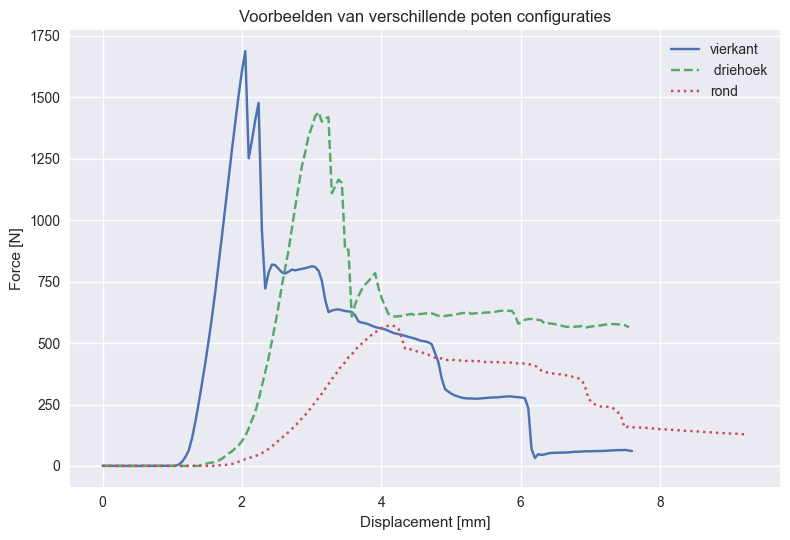

In [24]:
data_visualisation2(krukje_13v, krukje_13d, krukje_16r, 'Voorbeelden van verschillende poten configuraties', 'vierkant', ' driehoek', 'rond')

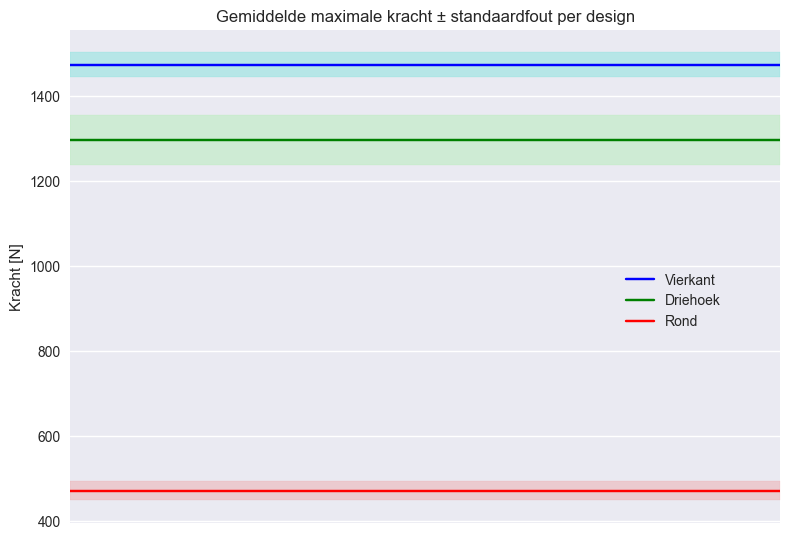

In [123]:
data_visualisation3(max_force_v, max_force_d, max_force_r, 'Vierkant', 'Driehoek', 'Rond', 'Kracht [N]',
    'Gemiddelde maximale kracht ± standaardfout per design')

In [ ]:
data_visualisation3(max_force_v, max_force_d, max_force_r, 'Vierkant', 'Driehoek', 'Rond', 'Kracht [N]',
    'Gemiddelde maximale kracht ± standaardfout per design')

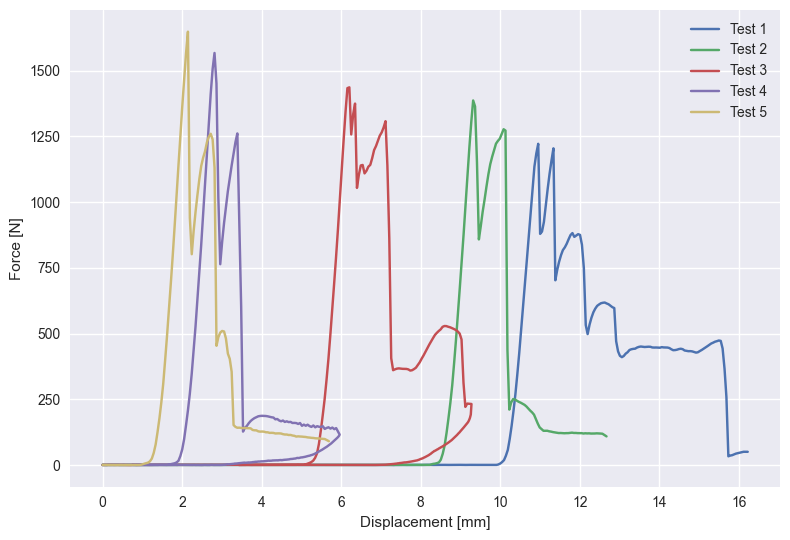

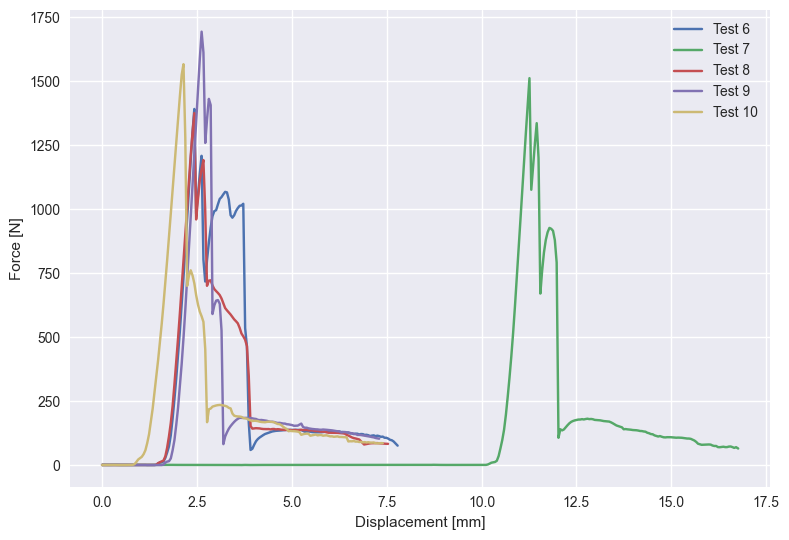

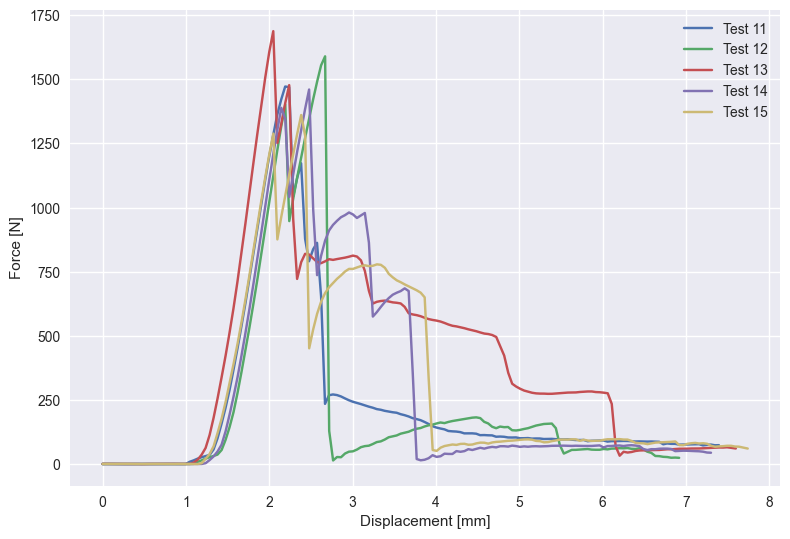

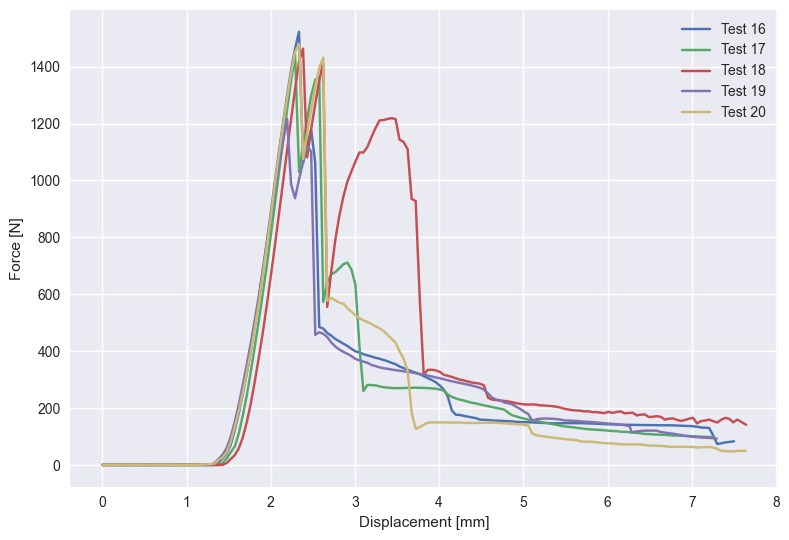

In [119]:
data_visualisation(krukje_1v, krukje_2v, krukje_3v, krukje_4v, krukje_5v, 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5')
data_visualisation(krukje_6v, krukje_7v, krukje_8v, krukje_9v, krukje_10v, 'Test 6', 'Test 7', 'Test 8', 'Test 9', 'Test 10')
data_visualisation(krukje_11v, krukje_12v, krukje_13v, krukje_14v, krukje_15v, 'Test 11', 'Test 12', 'Test 13', 'Test 14', 'Test 15')
data_visualisation(krukje_16v, krukje_17v, krukje_18v, krukje_19v, krukje_20v, 'Test 16', 'Test 17', 'Test 18', 'Test 19', 'Test 20')

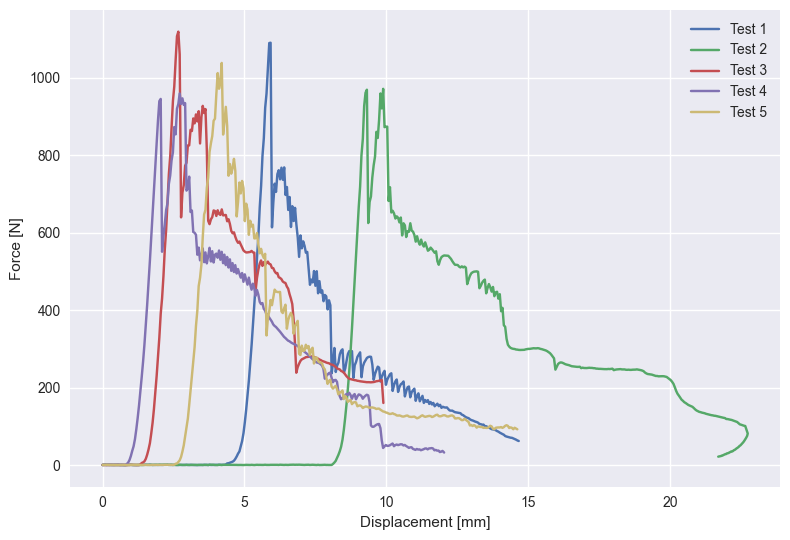

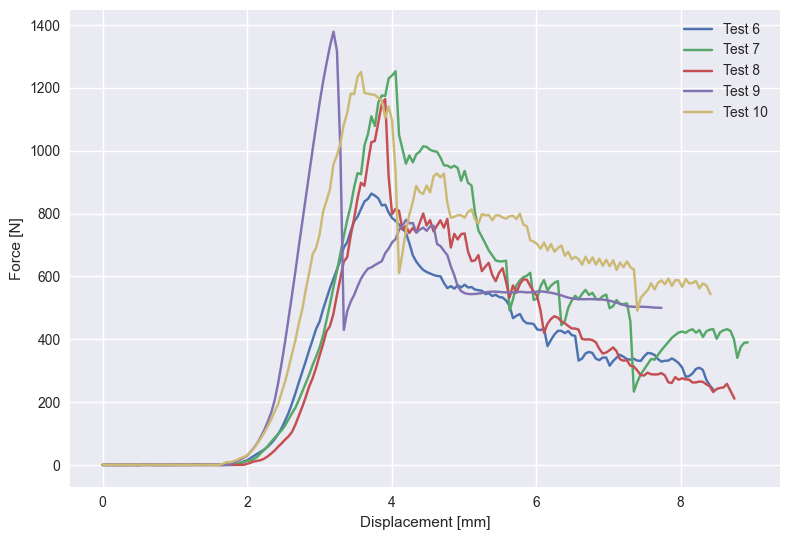

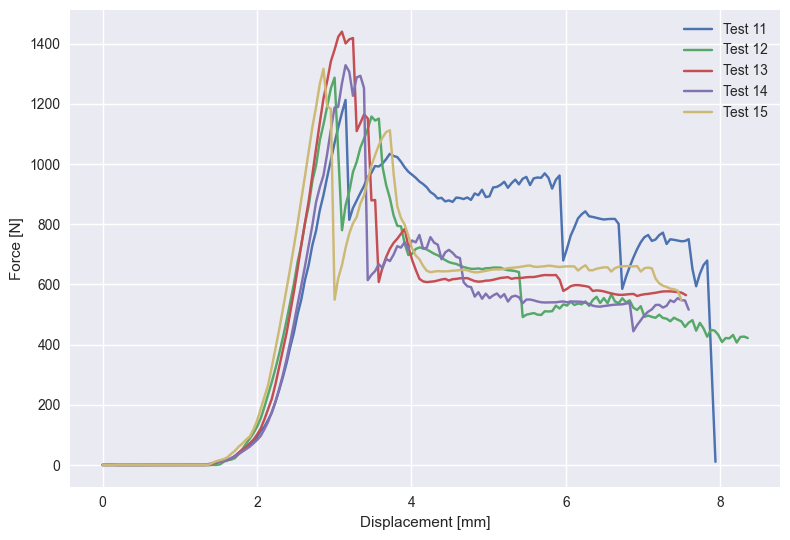

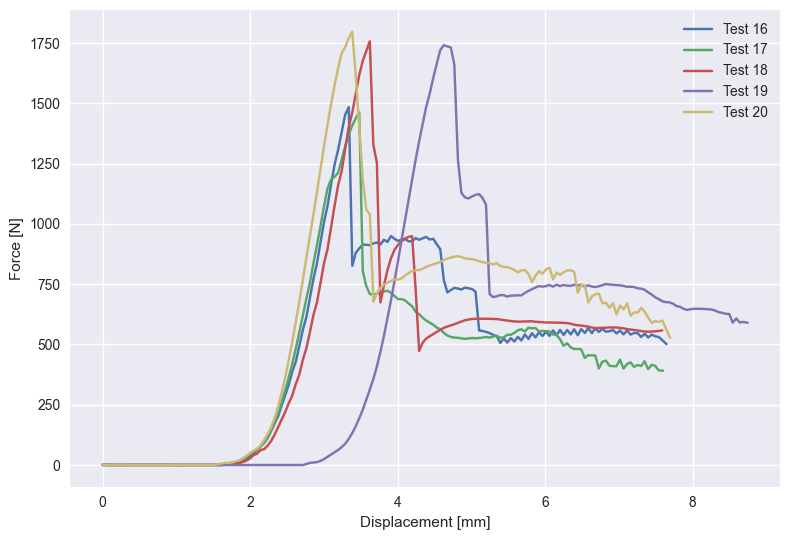

In [120]:
data_visualisation(krukje_1d, krukje_2d, krukje_3d, krukje_4d, krukje_5d, 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5')
data_visualisation(krukje_6d, krukje_7d, krukje_8d, krukje_9d, krukje_10d, 'Test 6', 'Test 7', 'Test 8', 'Test 9', 'Test 10')
data_visualisation(krukje_11d, krukje_12d, krukje_13d, krukje_14d, krukje_15d, 'Test 11', 'Test 12', 'Test 13', 'Test 14', 'Test 15')
data_visualisation(krukje_16d, krukje_17d, krukje_18d, krukje_19d, krukje_20d, 'Test 16', 'Test 17', 'Test 18', 'Test 19', 'Test 20')

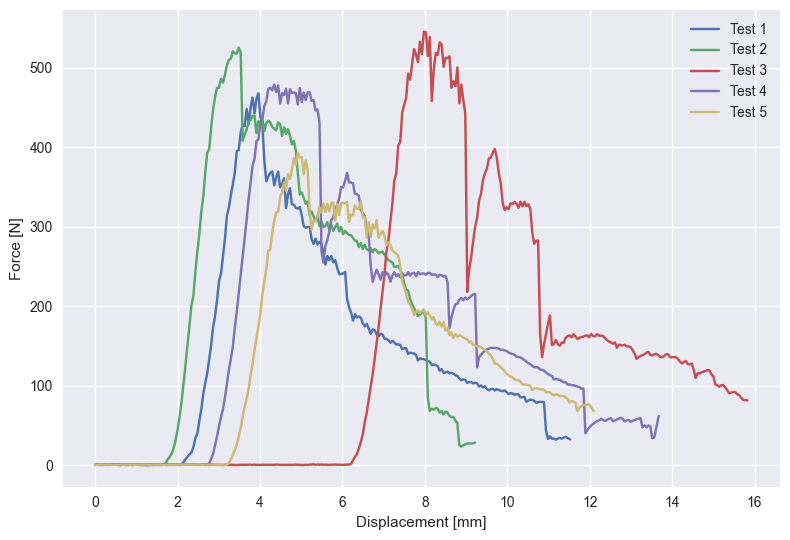

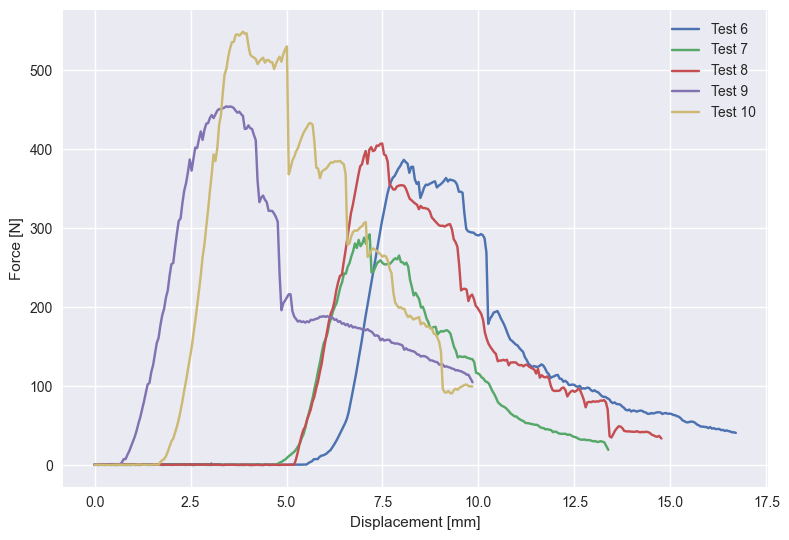

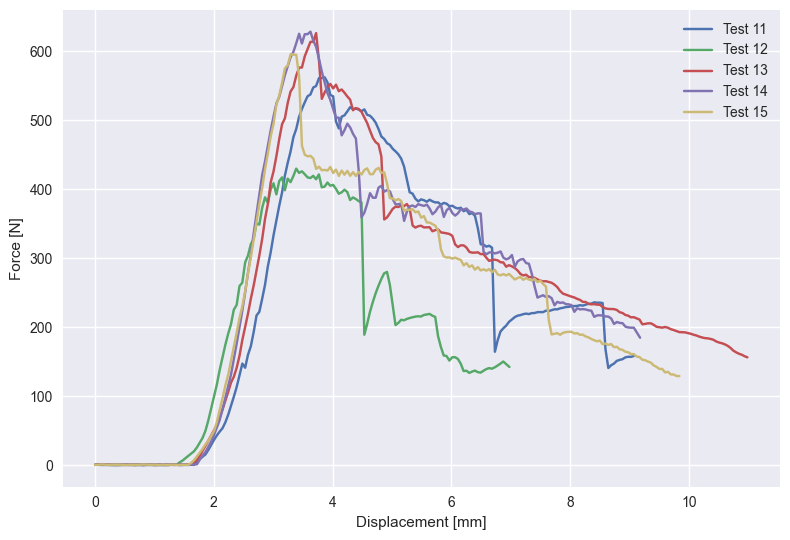

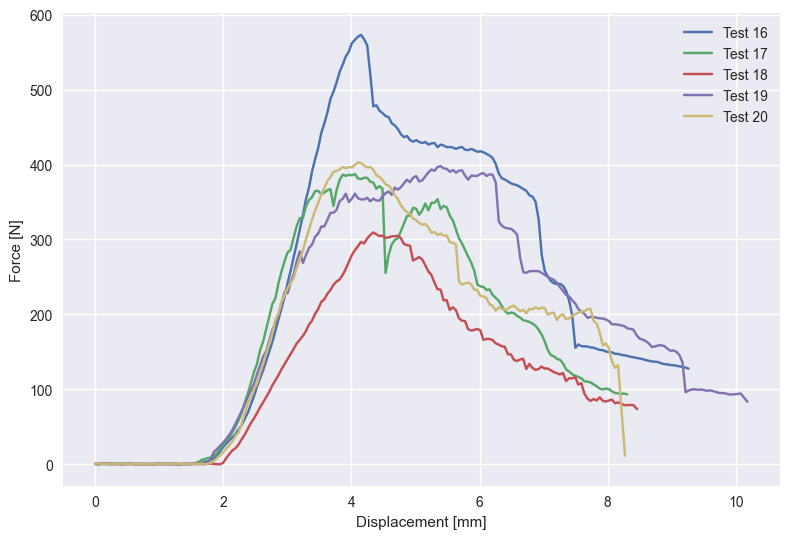

In [121]:
data_visualisation(krukje_1r, krukje_2r, krukje_3r, krukje_4r, krukje_5r, 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5')
data_visualisation(krukje_6r, krukje_7r, krukje_8r, krukje_9r, krukje_10r, 'Test 6', 'Test 7', 'Test 8', 'Test 9', 'Test 10')
data_visualisation(krukje_11r, krukje_12r, krukje_13r, krukje_14r, krukje_15r, 'Test 11', 'Test 12', 'Test 13', 'Test 14', 'Test 15')
data_visualisation(krukje_16r, krukje_17r, krukje_18r, krukje_19r, krukje_20r, 'Test 16', 'Test 17', 'Test 18', 'Test 19', 'Test 20')

In [135]:
def plot(data1, data2, data3, y_as):
    x = np.array(['Vierkant', 'Driehoek', 'Rond'])
    y = np.array([data_analysis(data1)[0], data_analysis(data2)[0], data_analysis(data3)[0]])
    error = np.array([data_analysis(data1)[3], data_analysis(data2)[3], data_analysis(data3)[3]])
    x_axis = np.arange(len(x))
    
    plt.bar(x, y)
    plt.errorbar(x, y, yerr=error, fmt="o", color='red')
    
    plt.xticks(x_axis, x)
    plt.ylabel(f'{y_as}')
    plt.tight_layout()
    plt.show()

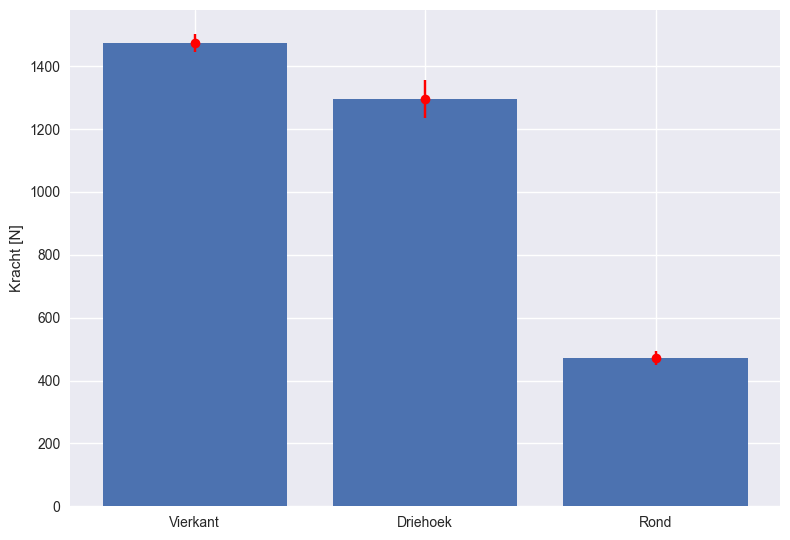

In [136]:
plot(max_force_v, max_force_d, max_force_r, 'Kracht [N]')